# Regression Model For Predicting House Prices

Author: Nishant Sahni

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

The data is first loaded onto a pandas dataframe and some summary statistics are obtained. The correlation between attribute columns is also obtained. The data.describe() function gives some summary statistics for each feature including count, mean, minimum value, maximum value, etc. The data.isna() is used to determine if there are any missing values or erroneous values in the data.

In [2]:
data = pd.read_csv('/Users/Nishant/Desktop/Machine Learning/Exam/regression_housing_prices.csv')
data.head()
print(data.keys())
print("")
print(data.describe())
print("")
print(data.corr())
print(data.isna())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.00

After observing and exploring the information above, the columns having low correlation with the target (price) are droped as they have a low impact on the prediction. The final list of features is then obtained.

In [40]:
featurelist = []
threshold = 0.25

for item in data:
	if item != 'date' and item != 'price':
		corr = float(data[item].corr(data['price']))
		print(item, corr)
		if corr >= threshold:
			featurelist.append(item)

print("")
print("Final Feature List: ", featurelist)

id -0.016762196614445106
bedrooms 0.3083495981456384
bathrooms 0.5251375054139618
sqft_living 0.7020350546118
sqft_lot 0.08966086058710003
floors 0.25679388755071836
waterfront 0.26636943403060204
view 0.39729348829450406
condition 0.036361789128997554
grade 0.6674342560202366
sqft_above 0.6055672983560781
sqft_basement 0.323816020711984
yr_built 0.05401153149479275
yr_renovated 0.1264337934408929
zipcode -0.053202854298325594
lat 0.30700347999521854
long 0.021626241039305865
sqft_living15 0.5853789035795685
sqft_lot15 0.08244715251948598

Final Feature List:  ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']


The X and y values are then loaded into dataframes as follows.

In [6]:
X = (pd.DataFrame(data, columns=(featurelist))).as_matrix()
y = (pd.DataFrame(data, columns=(['price']))).as_matrix()

The data is then split into training and testing sets with a 80:20 split. This is done so that the model can be trained with the training data and the prediction accuracy can be measured with respect to the testing data.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

A series of plots is obtained for each feature with the target to further examine their correlation.

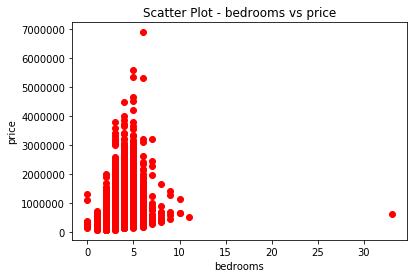

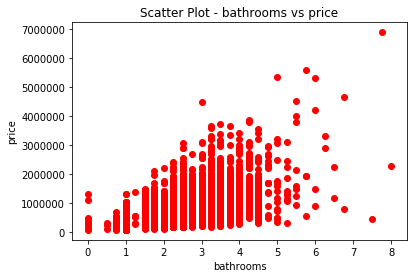

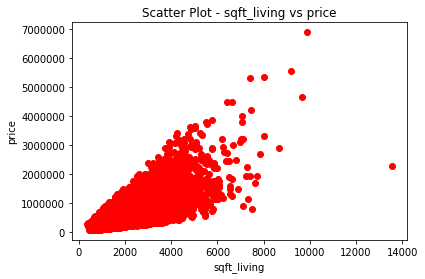

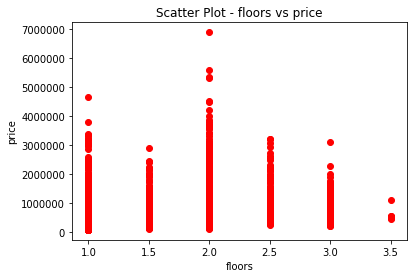

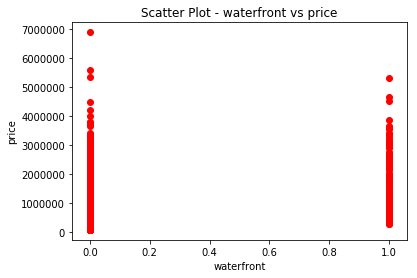

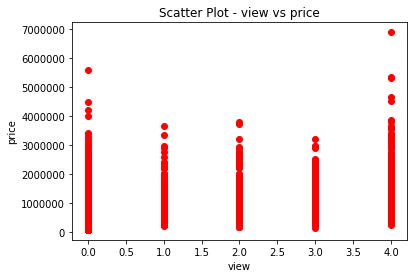

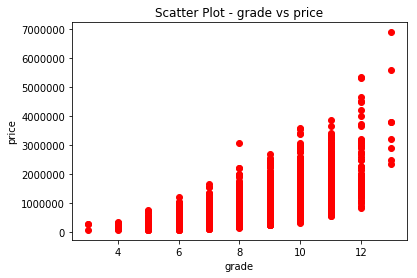

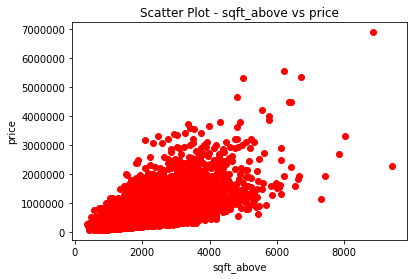

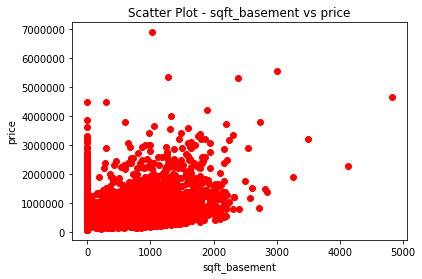

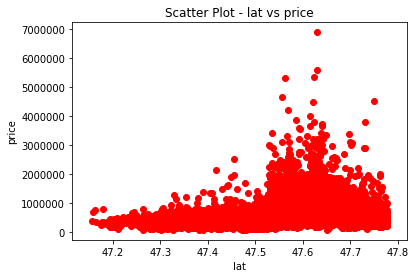

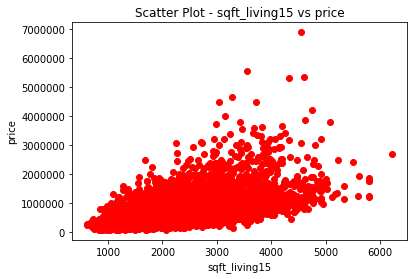

In [12]:
for i in range(0, len(featurelist), 1):
	plt.title("Scatter Plot - %s vs price" %featurelist[i])
	plt.xlabel(featurelist[i])
	plt.ylabel('price')
	plt.scatter(x_train[:, i], y_train[:, 0], c='red')
	plt.show()

# Ordinary Least Squares Regression

We then start by trying Linear Regression with our data. Since the data has values with varying ranges, it is decided to normalize it so that it gives better results with regression. This is done by setting normalize to True.

In [13]:
linreg = LinearRegression(normalize=True)

GridSearchCV is used to carry out 5-fold cross validation. Cross validation is used to avoid over fitting by training multiple models on a certain number of subsets of the data and then evaluating the model.

In [14]:
ols = GridSearchCV(linreg, cv=5, param_grid={})

We then train the data.

In [15]:
ols.fit(x_train, np.ravel(y_train))

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

A set of scores is obtained for the model. This includes the cross validation score.

In [37]:
print("")
print("SCORES FOR ORDINARY LEAST SQUARES:")
print("")
print("Gridsearch CV score: ", ols.best_score_)
print("Training set score: ", ols.score(x_train, y_train))
print("Linear accuracy score: ", ols.score(x_test, y_test))


SCORES FOR ORDINARY LEAST SQUARES:

Gridsearch CV score:  0.655886358719
Training set score:  0.657720287163
Linear accuracy score:  0.655992463273


We then use the trained model to predict the test data.

In [41]:
ols_predictions = ols.predict(x_test)

The mean square error and r^2 score are obtained for the predictions.

In [20]:
print("Mean squared error: ", mean_squared_error(y_test, ols_predictions))
print('r^2 score: ', r2_score(y_test, ols_predictions))

Mean squared error:  50257564025.4
r^2 score:  0.655992463273


A graph is then plotted between predicted prices and actual prices.

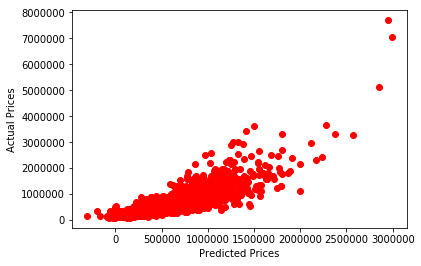

In [22]:
plt.scatter(ols_predictions, y_test, c='red')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.show()

# Lasso Regression 

We then move on to Lasso Regression. Since the data has values with varying ranges, it is decided to normalize it so that it gives better results with regression. This is done by setting normalize to True.

In [23]:
lassreg = Lasso(normalize=True)

GridSearchCV is used to conduct 5-fold cross validation and for the selection of the alpha parameter. The model is then trained.

In [ ]:
lasso = GridSearchCV(lassreg, cv=5, param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2]})
lasso.fit(x_train, np.ravel(y_train))

Some scores are then obtained. Also, the best parameters selected by GridSearchCV can be found below.

In [27]:
print("")
print("SCORES FOR LASSO:")
print("")
print("Gridsearch CV score: ", lasso.best_score_)
print("Training set score: ", lasso.score(x_train, y_train))
print("Linear accuracy score: ", lasso.score(x_test, y_test))
print("Best Parameters Selected: ", lasso.best_params_)


SCORES FOR LASSO:

Gridsearch CV score:  0.655954015565
Training set score:  0.6577144156
Linear accuracy score:  0.655870981366
Best Parameters Selected:  {'alpha': 2}


As we can see, the best value of alpha was selected to be 2. We now use the trained model to predict our test data.

In [26]:
lasso_predictions = lasso.predict(x_test)

The mean square error and r^2 score are then obtained as follows.

In [28]:
print("Mean squared error: ", mean_squared_error(y_test, lasso_predictions))
print('r^2 score: ', r2_score(y_test, lasso_predictions))

Mean squared error:  50275311847.8
r^2 score:  0.655870981366


A graph is then plotted showing the predicted values versus the actual values of the price.

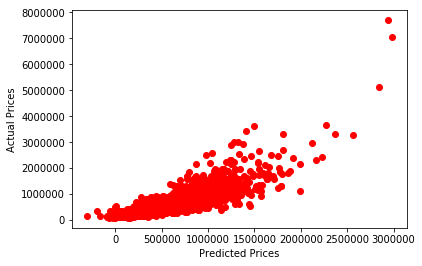

In [29]:
plt.scatter(lasso_predictions, y_test, c='red')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.show()

# Kernalized Ridge Regression

Kernelized Ridge Regression is attempted with our data next.

In [30]:
kernreg = KernelRidge()

Since the data has values with varying ranges, it is decided to normalize it so that it gives better results with regression. Also, since this is a non-linear model, this helps to speed up the training process.

In [31]:
x_train_normalized = normalize(x_train, norm='l2')
x_test_normalized = normalize(x_test, norm='l2')

GridSearchCV is then used to conduct 5-fold cross validation and to select the best parameters and kernels from the ones specified in the question. The data is then trained with this model.

In [32]:
ridge = GridSearchCV(kernreg, cv=5, param_grid=[{'kernel': ['linear']}, {'alpha': [1], 'kernel': ['poly'], 'gamma': [1], 'degree': [2, 4, 7]}, {'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1, 2, 4]}])
ridge.fit(x_train_normalized, np.ravel(y_train))

GridSearchCV(cv=5, error_score='raise',
       estimator=KernelRidge(alpha=1, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear']}, {'alpha': [1], 'kernel': ['poly'], 'gamma': [1], 'degree': [2, 4, 7]}, {'kernel': ['rbf'], 'gamma': [0.1, 0.5, 1, 2, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

The cross validation score and a few other statistics are obtained as follows.

In [39]:
print("")
print("SCORES FOR KERNALIZED RIDGE:")
print("")
print("Gridsearch CV score: ", ridge.best_score_)
print("Training set score: ", ridge.score(x_train_normalized, y_train))
print("Linear accuracy score: ", ridge.score(x_test_normalized, y_test))
print("Best Parameters Selected: ", ridge.best_params_)


SCORES FOR KERNALIZED RIDGE:

Gridsearch CV score:  0.419352148543
Training set score:  0.426273514371
Linear accuracy score:  0.433618651784
Best Parameters Selected:  {'alpha': 1, 'degree': 7, 'gamma': 1, 'kernel': 'poly'}


The best parameters selected by GridSearchCV can be observed above. The trained model is then used to predict the test values.

In [34]:
ridge_predictions = ridge.predict(x_test_normalized)

The mean square error and r^2 scores are then obtained.

In [35]:
print("Mean squared error: ", mean_squared_error(y_test, ridge_predictions))
print('r^2 score: ', r2_score(y_test, ridge_predictions))

Mean squared error:  82745125707.2
r^2 score:  0.433618651784


A graph is then plotted to show the predicted results versus actual prices.

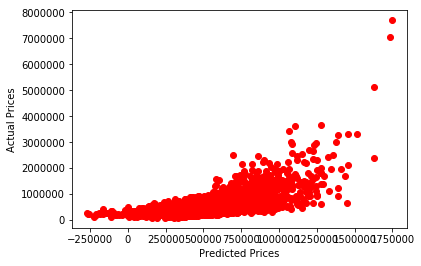

In [38]:
plt.scatter(ridge_predictions, y_test, c='red')
plt.xlabel('Predicted Prices')
plt.ylabel('Actual Prices')
plt.show()

# After observing the results from the above algorithms it is concluded that Ordinary Least Squares Regression gives the best results with this data set. It has a Mean Squared Error of 50257564025.4 and a R^2 value of  0.655992463273. The Mean Squared Error gives the actual distance between the points and the regression line. The R^2 value gives an insight into how well the predicted values fit the actual values.